In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
# Importing data
data = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
del data['Unnamed: 32']

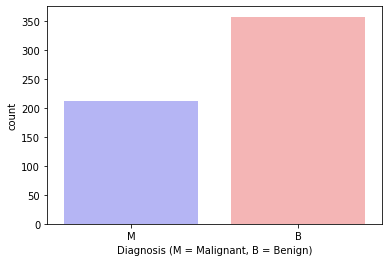

In [5]:
sns.countplot(x="diagnosis", data=data, palette="bwr")
plt.xlabel("Diagnosis (M = Malignant, B = Benign)")
plt.show()

In [6]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

In [7]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [9]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

# Adding the second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

# Adding the output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))






In [10]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=100, nb_epoch=150)

Epoch 1/150
512/512 [==============================] - 0s 887us/step - loss: 0.6926 - accuracy: 0.6191
Epoch 2/150
512/512 [==============================] - 0s 39us/step - loss: 0.6904 - accuracy: 0.6484
Epoch 3/150
512/512 [==============================] - 0s 29us/step - loss: 0.6867 - accuracy: 0.7363
Epoch 4/150
512/512 [==============================] - 0s 35us/step - loss: 0.6804 - accuracy: 0.8516
Epoch 5/150
512/512 [==============================] - 0s 35us/step - loss: 0.6710 - accuracy: 0.9102
Epoch 6/150
512/512 [==============================] - 0s 30us/step - loss: 0.6565 - accuracy: 0.9277
Epoch 7/150
512/512 [==============================] - 0s 31us/step - loss: 0.6355 - accuracy: 0.9434
Epoch 8/150
512/512 [==============================] - 0s 38us/step - loss: 0.6079 - accuracy: 0.9355
Epoch 9/150
512/512 [==============================] - 0s 25us/step - loss: 0.5728 - accuracy: 0.9473
Epoch 10/150
512/512 [==============================] - 0s 36us/step - loss: 0.52

512/512 [==============================] - 0s 28us/step - loss: 0.0481 - accuracy: 0.9902
Epoch 81/150
512/512 [==============================] - 0s 25us/step - loss: 0.0542 - accuracy: 0.9863
Epoch 82/150
512/512 [==============================] - 0s 27us/step - loss: 0.0494 - accuracy: 0.9844
Epoch 83/150
512/512 [==============================] - 0s 26us/step - loss: 0.0481 - accuracy: 0.9863
Epoch 84/150
512/512 [==============================] - 0s 28us/step - loss: 0.0534 - accuracy: 0.9863
Epoch 85/150
512/512 [==============================] - 0s 32us/step - loss: 0.0537 - accuracy: 0.9844
Epoch 86/150
512/512 [==============================] - 0s 35us/step - loss: 0.0524 - accuracy: 0.9863
Epoch 87/150
512/512 [==============================] - 0s 28us/step - loss: 0.0542 - accuracy: 0.9844
Epoch 88/150
512/512 [==============================] - 0s 29us/step - loss: 0.0537 - accuracy: 0.9883
Epoch 89/150
512/512 [==============================] - 0s 26us/step - loss: 0.0465 - 

In [12]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [13]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [14]:
cm

array([[34,  1],
       [ 0, 22]])

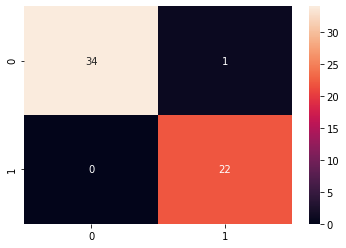

In [15]:
sns.heatmap(cm,annot=True)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9824561403508771

In [17]:
accuracy = accuracy_score(y_test,y_pred)*100

In [18]:
accuracy

98.24561403508771